In [44]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from PIL import Image

In [3]:
df=pd.read_csv('train.csv')

In [5]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
pixels = df.iloc[0,1:] # without label


In [61]:
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
image = Image.fromarray(pixels)
image

In [64]:
data=df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
x=data[:,1:]
y=data[:,0]
print(x.shape,'\n',y.shape)

(42000, 784) 
 (42000,)


In [72]:
split=int(0.8*x.shape[0])
split

33600

In [79]:
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:,:]
y_test=y[split:]


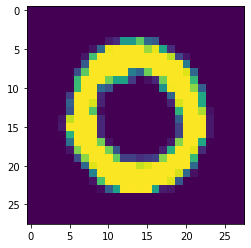

In [89]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
drawImg(x_train[1])

In [94]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,qp,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d = dist(qp,x[i])
        vals.append((d,y[i]))
    vals = np.array(sorted(vals))
    predict=np.unique(vals[:k,1],return_counts=True)
    index = predict[1].argmax()
 #   print(vals)
    return predict[0][index]
    

In [110]:
qp=x_test[3]

In [111]:
knn(x_train,y_train,qp)


2.0

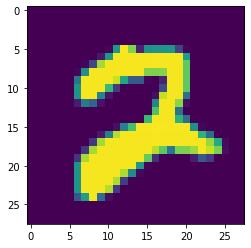

In [112]:
drawImg(qp)